# PREPARATION

## import librairies

In [1]:
# Machine Lerning
import tensorflow as tf
import keras as ks

# Indispensables
import pandas as pd
import numpy as np
import geopandas as gpd
import math

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name)
print(platform.system())
print(platform.release())
#
import argparse
from datetime import datetime
import h5py
import importlib

# VISU
from IPython.display import Image, IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# IMAGES
from PIL import Image
import rasterio
import imageio

import colorsys
print('TensorFlow: %s' % tf.__version__)
print('Kerasw: %s' % ks.__version__)
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
print('Geo Panda version: %s' % gpd.__version__)


Using TensorFlow backend.


posix
Darwin
18.7.0
TensorFlow: 2.0.0
Kerasw: 2.3.1
Panda version: 0.25.1
Numpy version: 1.17.2
Geo Panda version: 0.7.0


## Déclaration des directories et variables

In [2]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    separe = "\\"

DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
Data ROOT directory: /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/


['/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python37.zip',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/lib-dynload',
 '',
 '/Users/pierreleisy/.local/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pierreleisy/.ipython',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m\\']

## création des listes d'images

In [3]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#[:2]  
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#[:2]   
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 58773 58768


# DONNEES

## Lecture des images (tests)

In [4]:
print(liste_1[:2])
fichier1 = liste_1[0]
im1 = imageio.imread(fichier1)
print(im1.shape)
df1 = pd.DataFrame(im1)
print(df1)

df1.describe()

['/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043020_7272860_NumPoints5m.tif', '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042520_7272025_NumPoints5m.tif']
(10, 10)
     0    1    2    3    4    5    6    7    8    9
0  6.0  5.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  3.0  1.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  7.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  1.0  4.0  2.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0
6  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0
7  0.0  0.0  0.0  2.0  0.0  0.0  2.0  6.0  1.0  1.0
8  1.0  1.0  0.0  0.0  0.0  0.0  1.0  6.0  1.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  4.0  1.0


,0,1,2,3,4,5,6,7,8,9
count,10.00,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.00,0.700000,0.300000,0.900000,1.400000,0.600000,0.700000,1.700000,0.700000,0.200000
std,2.00,1.567021,0.948683,0.994429,2.366432,0.966092,0.823273,2.451757,1.251666,0.421637
min,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
75%,0.75,0.750000,0.000000,1.000000,1.750000,1.500000,1.000000,2.500000,1.000000,0.000000
max,6.00,5.000000,3.000000,3.000000,7.000000,2.000000,2.000000,6.000000,4.000000,1.000000


## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [5]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [6]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [7]:
lampes1.head(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
52,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif
92,1,92,92,0,2042500,7272460,2042500_7272460_NumPoints5m.tif,2042500_7272460_EcartZ5m.tif,2042500_7272460_Position5m.tif
170,1,170,170,0,2042500,7272850,2042500_7272850_NumPoints5m.tif,2042500_7272850_EcartZ5m.tif,2042500_7272850_Position5m.tif
249,1,249,49,1,2042505,7272245,2042505_7272245_NumPoints5m.tif,2042505_7272245_EcartZ5m.tif,2042505_7272245_Position5m.tif
281,1,281,81,1,2042505,7272405,2042505_7272405_NumPoints5m.tif,2042505_7272405_EcartZ5m.tif,2042505_7272405_Position5m.tif
303,1,303,103,1,2042505,7272515,2042505_7272515_NumPoints5m.tif,2042505_7272515_EcartZ5m.tif,2042505_7272515_Position5m.tif
307,1,307,107,1,2042505,7272535,2042505_7272535_NumPoints5m.tif,2042505_7272535_EcartZ5m.tif,2042505_7272535_Position5m.tif
405,1,405,5,2,2042510,7272025,2042510_7272025_NumPoints5m.tif,2042510_7272025_EcartZ5m.tif,2042510_7272025_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45mn ???    pour 40000 fichiers

### création de la table de 200-300 colonnes

In [233]:
#  limitation à 1000-5000 valeurs
off = 2000
off = len(lampes0)
NN = 0
NM = NN + off

n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100

#################################################
#################################################
###   TODO ... regarder l'unicité des 2 listes
#################################################
#################################################

### assemble 2 listes (lampadaires totale + NM * valeurs au hazard ... fichiers unique)
#list_lamp0 = list(set(lampes0['nom_NUM'][NN:NM] + list(DALLE_NUM + list_lamp1)))
list_lamp0 = list(DALLE_NUM + lampes0['nom_NUM'][NN:NM]) + list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp0b = list(lampes0['present'][NN:NM]) + list(lampes1['present'])
#lamp0 = np.array(list_lamp0b)
list_lamp1 = list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp2 = list(DALLE_ECA + lampes1['nom_ECA'])
#print(list_lamp0[:2])
#print(list_lamp1[:2])
#print(list_lamp2[:2])
print(len(list_lamp0), len(list_lamp0b), len(list_lamp1), len(list_lamp2))

i=0
for n,fich1 in enumerate(list_lamp0):
    if n%500 == 1:
        print(n, i, list_lamp0b[n], fich1)
    fiche1 =fich1
    fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
    fiche2 = fich2
    #fich3 = fich1.replace("NumPoints5m", "Position5m")
    #fiche3 = DALLE_POS+fich3
    
# fichiers dalles manquantes ???? ... pourquoi ?????
    if os.path.exists(fiche1) and os.path.exists(fiche2):    # Manque des fichiers sur les 40000
        i += 1
        data1 = np.reshape(imageio.imread(fiche1), N2) #.flatten()
        data1T = np.expand_dims(data1, axis=0)
        data2 = np.reshape(imageio.imread(fiche2), N2)
        data2T = np.expand_dims(data2, axis=0)
        #data3 = np.reshape(imageio.imread(fiche3), N2)
        #data3T = np.expand_dims(data3, axis=0)
        #print(i, data1T.shape, data2T.shape, data3T.shape)
        df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
        df_int2 = pd.DataFrame(data2T, index=[i])  
        #df_int3 = pd.DataFrame(data3T, index=[i])
        # MERGE 
        #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
        df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        df_int['label'] = list_lamp0b[n]    #
        if i == 1:
            #print(dataT)
            df3 = df_int
        else:
            df3 = pd.concat([df3, df_int])
    else:
        pass     #print(fiche1, fich2)
if i > 0:
    print(n+1, i, n+1-i, df3.shape, df3.shape[0]/i)

for n in range(0,N2):
    df3 = df3.astype({str(n)+'_num': 'int8'}, copy=False)
#print(df3.dtypes)
df3

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

40357 40357 357 357
1 1 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042500_7272005_NumPoints5m.tif
501 390 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042510_7272505_NumPoints5m.tif
1001 809 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042525_7272005_NumPoints5m.tif
1501 1229 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042535_7272505_NumPoints5m.tif
2001 1639 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042550_7272005_NumPoints5m.tif
2501 2058 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042560_7272505_NumPoints5m.tif
3001 2424 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042575_7272005_NumPoints5m.tif
3501 2847 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2042585_7272505_NumPoints5m.tif
4001 

33001 24728 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043325_7272005_NumPoints5m.tif
33501 25040 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043335_7272505_NumPoints5m.tif
34001 25345 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043350_7272005_NumPoints5m.tif
34501 25710 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043360_7272505_NumPoints5m.tif
35001 26070 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043375_7272005_NumPoints5m.tif
35501 26437 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043385_7272505_NumPoints5m.tif
36001 26765 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043400_7272005_NumPoints5m.tif
36501 27111 0 S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\DallesNumPoints5m\2043410_7272505_NumPoints5m.tif


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
1,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
2,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.30,0.00,0
3,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.00,0.00,0
4,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.00,0.00,0
5,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29732,1,2,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29733,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29734,5,4,3,8,0,0,0,0,0,3,...,0.71,0.00,0.05,0.27,0.00,0.00,0.0,0.07,0.03,1
29735,0,0,1,0,0,0,1,0,5,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1


In [236]:
df3_new = df3.copy()

In [188]:
test = df3_1000.describe()[:3].T
test['val'] = (test['count'] * test['mean'])
test

,count,mean,std,val
0_num,1182.0,0.754653,1.622985,892.00
1_num,1182.0,0.776650,1.665264,918.00
2_num,1182.0,0.705584,1.562024,834.00
3_num,1182.0,0.675127,1.548332,798.00
4_num,1182.0,0.714890,1.591392,845.00
...,...,...,...,...
96_h,1182.0,0.156286,0.731763,184.73
97_h,1182.0,0.185203,0.825357,218.91
98_h,1182.0,0.180372,0.788900,213.20
99_h,1182.0,0.172927,0.812124,204.40


In [189]:
df3_1000.describe()

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,...,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,0.754653,0.776650,0.705584,0.675127,0.714890,0.712352,0.713198,0.694585,0.686125,0.696277,...,0.144814,0.150093,0.145008,0.147453,0.148393,0.156286,0.185203,0.180372,0.172927,0.306261
std,1.622985,1.665264,1.562024,1.548332,1.591392,1.655872,1.613285,1.603538,1.642614,1.788562,...,0.595784,0.666436,0.666528,0.678425,0.670106,0.731763,0.825357,0.788900,0.812124,0.461134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.000000,12.000000,13.000000,14.000000,11.000000,15.000000,13.000000,15.000000,22.000000,35.000000,...,8.190000,9.210000,9.960000,8.790000,8.780000,9.880000,10.400000,9.750000,11.380000,1.000000


## statistiques

         0_num     1_num     2_num     3_num     4_num     5_num     6_num  \
mean  0.754653  0.776650  0.705584  0.675127  0.714890  0.712352  0.713198   
std   1.622985  1.665264  1.562024  1.548332  1.591392  1.655872  1.613285   

         7_num     8_num     9_num  ...      91_h      92_h      93_h  \
mean  0.694585  0.686125  0.696277  ...  0.144814  0.150093  0.145008   
std   1.603538  1.642614  1.788562  ...  0.595784  0.666436  0.666528   

          94_h      95_h      96_h      97_h      98_h      99_h     label  
mean  0.147453  0.148393  0.156286  0.185203  0.180372  0.172927  0.306261  
std   0.678425  0.670106  0.731763  0.825357  0.788900  0.812124  0.461134  

[2 rows x 201 columns]


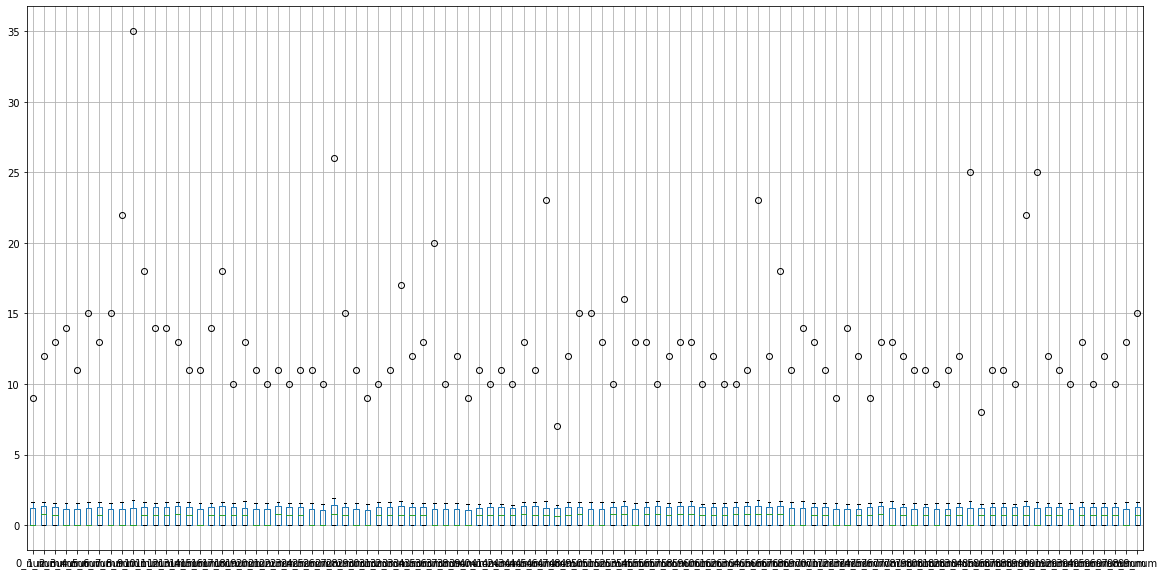

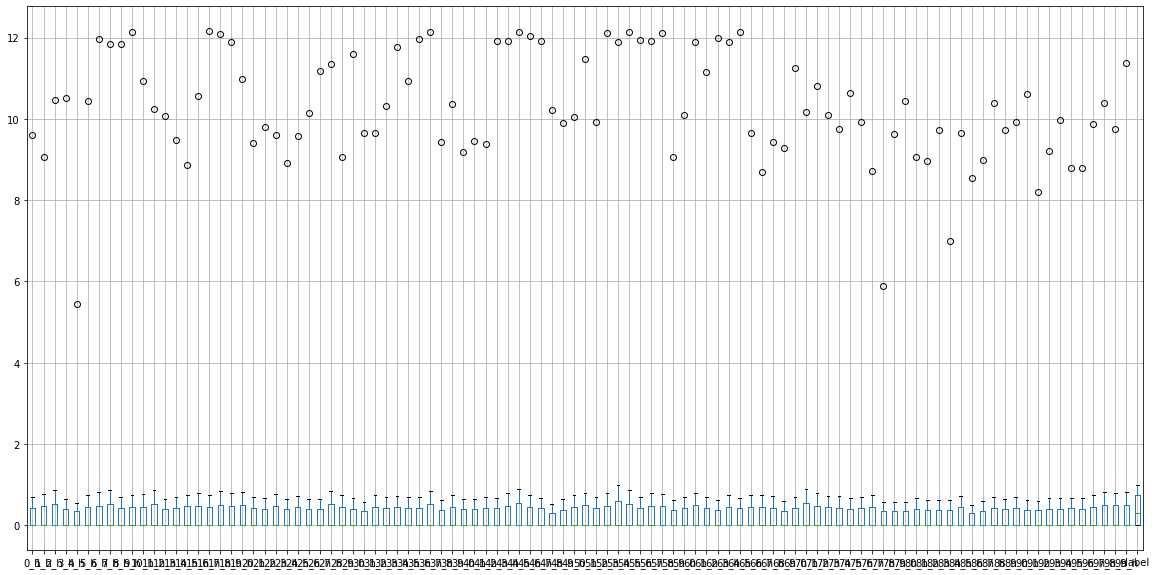

In [192]:
print(df3_1000.describe()[1:3])   # 'mean','std','max'

plt.figure(figsize=(20,10))
_ = df3_1000.iloc[:,:100].describe(include='all')[1:].boxplot()
plt.figure(figsize=(20,10))
_ = df3_1000.iloc[:,100:].describe(include='all')[1:].boxplot()


## Preparation

In [274]:
print(df3_5000.shape)
print(df4.shape)

(4516, 201)
(29736, 201)


### Normalisation des données   max= 10 - 35 ???

In [ ]:
# train = (train / 255) - 0.5
# test = (test / 255) - 0.5


### Reshape images

In [ ]:
# train = np.expand_dims(train, axis=3)
# test = np.expand_dims(test, axis=3)



# KERAS - TENSORFLOW

In [10]:
# Sauvegarde du fichier total 

if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"

#fileSAVE = DATA_DIR3 + "donnees_LAS_1k_1k.csv"
#df3.to_csv(fileSAVE, index=False)

df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
print(df4.shape)
df4.head()

(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.3,0.0,0
2,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0


In [11]:
tf.keras.datasets

<module 'tensorflow_core.keras.datasets' from '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/__init__.py'>

In [12]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]
y_binary = to_categorical(y)

train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)


#.datasets(donnees)

In [13]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2)


In [44]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History 

Nomb_Input = 200
M = 64    # 512-256-128-64-32 ? 
epochs = 10
batch_size = 64
num_class = 2

# ou model = Sequential() + model.add(Dense(N)) + model.add(Dropout(0.5)) + model.add(Activation('softmax'))
model0 = Sequential([
    Dense(M, activation='relu', input_shape=(Nomb_Input,)),
    Dropout(0.2),
    Dense(M, activation='relu', input_shape=(Nomb_Input,)),
    Dense(M, activation='relu'), #model.add(Dropout(0.2))
    Dropout(0.2),
    Dense(num_class, activation='softmax')   #
#    Dense(num_class, activation='softmax', output_dim=1,)
])

#    https://keras.io/losses 
#  loss fonctions: categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error ... etc
#  optimizer: 'sgd', 'adam', keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

model0.compile(loss="binary_crossentropy", optimizer='adam',  metrics=['accuracy'])
#model0.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
# Print with verbose=2 ???
history = model0.fit(train_data, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Train on 15937 samples, validate on 7851 samples
Epoch 1/10
 - 3s - loss: 0.1926 - accuracy: 0.9630 - val_loss: 0.1235 - val_accuracy: 0.9773
Epoch 2/10
 - 2s - loss: 0.1093 - accuracy: 0.9758 - val_loss: 0.1000 - val_accuracy: 0.9773
Epoch 3/10
 - 2s - loss: 0.0921 - accuracy: 0.9763 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 4/10
 - 2s - loss: 0.0799 - accuracy: 0.9778 - val_loss: 0.0874 - val_accuracy: 0.9796
Epoch 5/10
 - 2s - loss: 0.0677 - accuracy: 0.9800 - val_loss: 0.0866 - val_accuracy: 0.9808
Epoch 6/10
 - 2s - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0989 - val_accuracy: 0.9813
Epoch 7/10
 - 2s - loss: 0.0475 - accuracy: 0.9843 - val_loss: 0.0935 - val_accuracy: 0.9822
Epoch 8/10
 - 2s - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.1026 - val_accuracy: 0.9814
Epoch 9/10
 - 2s - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0974 - val_accuracy: 0.9814
Epoch 10/10
 - 2s - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.1029 - val_accuracy: 0.9819


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


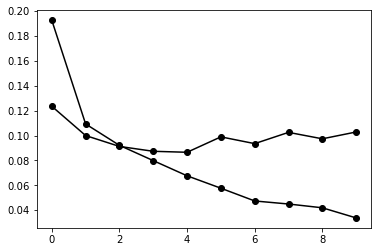

In [59]:
print(history.history.keys())
for i in range(0,4,2):
    plt.plot(list(history.history.values())[i],'k-o')


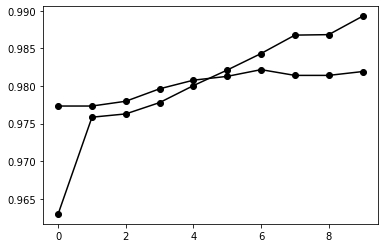

In [60]:
for j in range(1,4,2):
    plt.plot(list(history.history.values())[j],'k-o')

In [43]:
model0.summary()

# model.save_weights('file.h5')

# avec le model construit + les poids
# model.load_weights('file.h5')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 21,314
Trainable params: 21,314
Non-trainable params: 0
__________________________________________________

In [42]:
print(history.history.keys())
print(history.history['val_accuracy'][-1])
print(history.history['accuracy'][-1])
print(history.history['val_loss'][-1])
print(history.history['loss'][-1])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
0.9857342839241028
0.994039
0.11495584230231808
0.019896878992083637


Test loss: 0.10579293469629716
Test accuracy: 0.9863819479942322
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


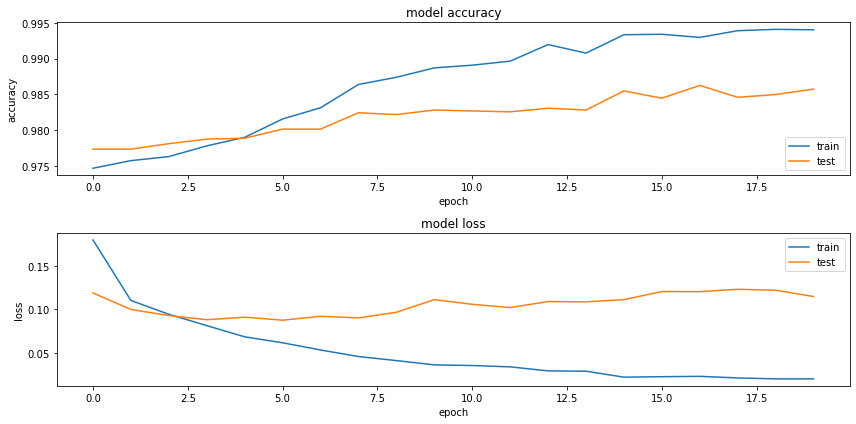

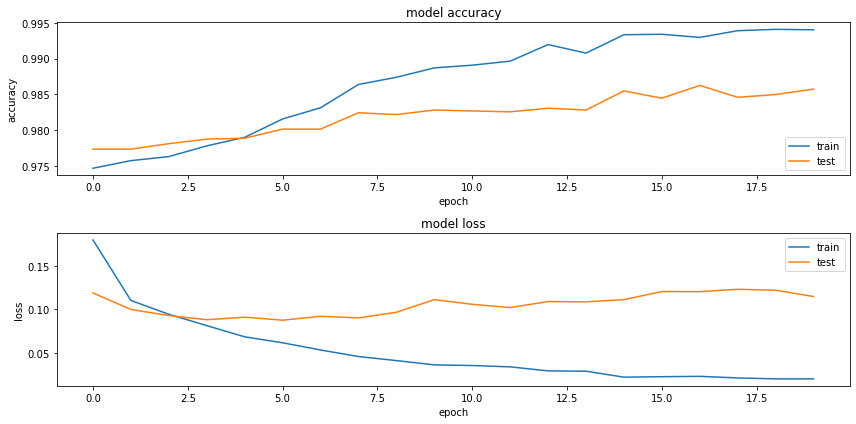

In [33]:
# RESULTATS
score = model0.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data, batch_size=batch_size)
predictions = model0.predict(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')

plt.tight_layout()
fig

In [269]:
# Trains a simplet CONVNET on the MNIST dataset

input_shape = (Nomb_Input,)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(test_data, test_labels))

score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: Input 0 is incompatible with layer conv2d_4: expected ndim=4, found ndim=2